# Homework Assignment #1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Section 1: Police Killings

In [4]:
killings = pd.read_csv('../data/police-killings.csv', index_col=[0])
killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 1. Make the following changes to column names:

- Rename "lawenforcementagency" to "agency"
- Rename "raceethnicity" to "race"

In [52]:
killings.rename(index=str, columns = {"lawenforcementagency": "agency", "raceethnicity": "race"}, inplace=True)
killings

,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669
5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,Phoenix Police Department,Gunshot,No,53596
6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,Bakersfield Police Department,Gunshot,Firearm,48552
7,Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,Los Angeles Police Department,Gunshot,Non-lethal firearm,55909
8,Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,Wise County Sheriff's Department and Texas DPS,Gunshot,Firearm,38310
9,Alan James,31,Male,White,February,7,2015,200 Abbie St SE,Wyoming,MI,Kentwood Police Department and Wyoming DPS,Gunshot,Other,51667


### 2. Show the count of missing values in each column

In [51]:
killings.isnull().sum()

name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

### 3. Replace each null/missing value in the dataframe with the string "unknown"

In [6]:
killings.fillna('unknown',inplace=True)
killings.isnull().sum()

name                    0
age                     0
gender                  0
raceethnicity           0
month                   0
day                     0
year                    0
streetaddress           0
city                    0
state                   0
lawenforcementagency    0
cause                   0
armed                   0
county_income           0
dtype: int64

### 4. How many killings were there in March and April?

In [14]:
a = killings[(killings.month =='March')+(killings.month =='April')]
a['month'].value_counts()

March    114
April     96
Name: month, dtype: int64

### 5. How many male and how many female victims are there?

In [16]:
b = killings[(killings.gender =='Male')+(killings.gender =='Female')]
b['gender'].value_counts()


Male      445
Female     22
Name: gender, dtype: int64

### 6. How many killings were of unarmed people?

In [18]:
c = killings[(killings.armed =='No')]
c['armed'].value_counts()

No    102
Name: armed, dtype: int64

### 7. What percentage of all killings were unarmed?

In [41]:
unarmK = killings.armed

perK = unarmK.value_counts(normalize=True)
perK[1]



0.21841541755888652

### 8. What are the 5 states with the most killings?

In [44]:
kS = killings.groupby('state').count()
kS.sort_values('name', ascending=False).head(5)[['name']]

,name
state,
CA,74
TX,46
FL,29
AZ,25
OK,22


### 9. Show a value counts of deaths for each race

In [56]:
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

### 10. Display a histogram of ages of all killings

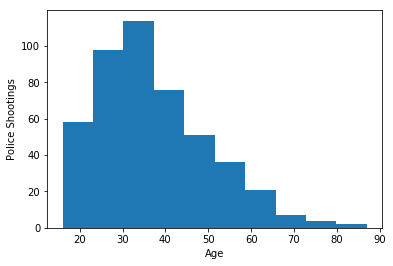

In [140]:
killings.age.plot(kind='hist')

plt.xlabel('Age')
plt.ylabel('Police Shootings')

### 11. Show histogram of ages for each race

16    NaN
27    NaN
26    NaN
25    NaN
29    NaN
29    NaN
22    NaN
35    NaN
44    NaN
31    NaN
76    NaN
40    NaN
40    NaN
31    NaN
23    NaN
39    NaN
25    NaN
54    NaN
24    NaN
57    NaN
21    NaN
42    NaN
21    NaN
36    NaN
26    NaN
49    NaN
54    NaN
26    NaN
48    NaN
33    NaN
     ... 
39    NaN
53    NaN
27    NaN
36    NaN
20    NaN
39    NaN
19    NaN
34    NaN
36    NaN
34    NaN
31    NaN
45    NaN
34    NaN
34    NaN
34    NaN
34    NaN
31    NaN
28    NaN
57    NaN
29    NaN
50    NaN
40    NaN
35    NaN
53    NaN
59    NaN
18    NaN
28    NaN
52    NaN
38    NaN
48    NaN
Name: race, Length: 467, dtype: object


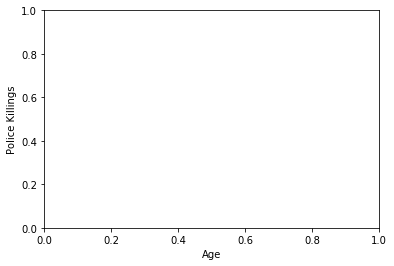

In [102]:
killings.
print ageRace
#list(ageRace.columns.values)
#ageRace.age.plot(kind='hist', by=ageRace['race'])
plt.xlabel('Age')
plt.ylabel('Police Killings')

### 12. What is the average age of death by race?

In [110]:
killings.age.groupby(killings['race']).mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

### 13. Show a bar chart with counts of deaths every month

In [142]:

killings.groupby(['month', 'month_number']).count().sort_level(level=1).reset_index(level=1, drop=True)
pos = np.arange(months.size)
months.values

plt.figure(figsize=(12,6))

months.plot(kind='bar')

KeyError: 'month_number'

## Section 2: College Majors

In [ ]:
majors = pd.read_csv('../data/college-majors.csv', index_col=[0])
majors.head()

### 1. Delete the columns (employed_full_time_year_round, major_code)


### 2. Show the count of missing values in each column

### 3. What are the top 10 highest paying majors?

### 4. Plot the data from the last question in a bar chart, include proper title, and labels


### 5. What is the average median salary for each major category?

### 6. Visualize only the top 5 paying major categories

### 7. Plot a histogram of the distribution of median salaries

### 8. Plot a histogram of the distribution of median salaries by major category

### 9. What are the top 10 most UNemployed majors?

### 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

## Section 3: FIFA Soccer Game data

In [ ]:
fifa = pd.read_csv('../data/fifa_data.csv')
fifa.head()

### 1. Clean up the dataset.

    - Lowercase the column names
    - Set the "name" column as the index
    - Drop the following columns "national_position", "national_kit", "club_kit", "club_joining", and "contract_expiry"
    - Get rid of all players who are goalkeepers and drop every column that starts with GK
    - Drop every player whose rating is less than 70
    - Convert the "height" and "weight" columns to float types
    - Check to see if there any nulls, if so drop them from the dataset

### 2.  Who are the top five players of the following attributes: speed, marking, and finishing

### 3. Who is the tallest French lefted foot player?

### 4. Show a pandas series of every attribute's correlation with the rating attribute

### 5. Make a heatmap of the dataset's correlation table

### 6. Return a dataframe with only players from the following clubs. Call the dataframe fifa2. From now on we'll be using fifa2

In [ ]:
clubs_list = ['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
              'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
              'Bor. Dortmund', 'Liverpool', 'Roma']

### 7. Make a bar plot of the average long_shots, curve, and dribbling attributes of the clubs in the data

### 8. Make a scatter plot of short_pass vs marking and use the preffered_foot column to color-encode the dots.